# SABR Model Test Code

In [32]:
import imp
import numpy as np
import matplotlib.pyplot as plt
import option_models as opt

In [33]:
### only run this when you changed the class definition
CODE_CHANGED = True
if( CODE_CHANGED ):
    imp.reload(opt)

## 1. Pricing using Hagan's formula (provided)

### (1) SABR for $0<\beta\le 1$

In [34]:
# Parameters
strike = np.linspace(75,125,num=25)
# strike = 110 # should work for scalar value 
forward = 100
sigma = 0.2
texp = 1
alpha = 0.3
rho = 0.25
beta = 1

In [35]:
# Create model
sabr_bsm = opt.sabr.ModelHagan(texp, sigma, alpha=alpha, rho=rho, beta=beta)
sabr_bsm.__dict__

{'beta': 1,
 'texp': 1,
 'sigma': 0.2,
 'alpha': 0.3,
 'rho': 0.25,
 'intr': 0,
 'divr': 0,
 'bsm_model': <option_models.bsm.Model at 0x2029cf6a128>}

In [36]:
# This is how you price. you can get either price or bsm_vol
price = sabr_bsm.price(strike, forward)
bsm_vol = sabr_bsm.bsm_vol(strike, forward)

price, bsm_vol

(array([25.54990056, 23.6710906 , 21.84772723, 20.08808242, 18.39998119,
        16.79046024, 15.26547396, 13.82967094, 12.48625486, 11.23693323,
        10.08194855,  9.0201795 ,  8.0492952 ,  7.16594441,  6.36596195,
         5.64457698,  4.99661108,  4.41665739,  3.8992357 ,  3.43892089,
         3.03044477,  2.66877274,  2.34915782,  2.06717523,  1.81874082]),
 array([0.19740451, 0.19730124, 0.19731138, 0.19742763, 0.19764276,
        0.19794962, 0.19834124, 0.19881083, 0.19935186, 0.19995804,
        0.2006234 , 0.20134229, 0.20210938, 0.20291966, 0.2037685 ,
        0.20465155, 0.20556483, 0.20650464, 0.2074676 , 0.20845059,
        0.20945078, 0.21046559, 0.21149265, 0.21252984, 0.21357521]))

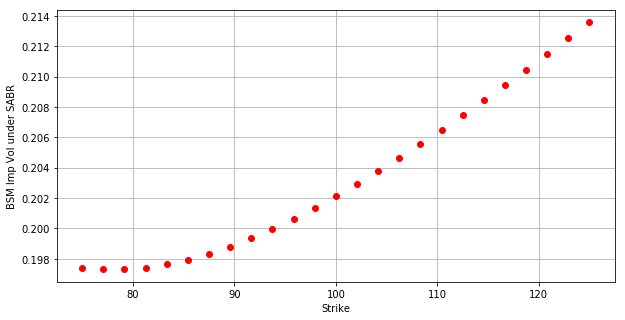

In [37]:
# volatility smile plot: try with different parameters
plt.figure(figsize=(10,5))
plt.plot(strike, bsm_vol, 'ro')
#plt.axis([0, 6, 0, 20])
plt.ylabel('BSM Imp Vol under SABR')
plt.xlabel('Strike')
plt.grid()
plt.show()

In [38]:
# implied vol (sigma in this case)
# you should get back the original sigma
sabr_bsm.impvol(price[11], strike[11], forward)

0.19999999999936008

### (2) SABR for $\beta=0$

In [39]:
strike = np.linspace(75,125,num=25)
#strike = 1
forward = 100
sigma = 20
texp = 1
alpha = 0.5
rho = -0.25
beta = 0

In [40]:
nvol = opt.sabr.norm_vol(strike, forward, texp, sigma, alpha=alpha, rho=rho)

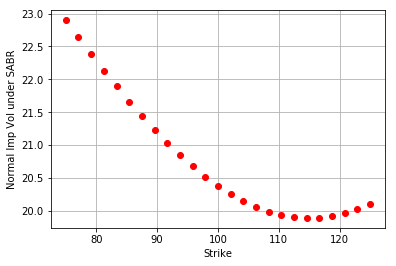

In [41]:
plt.plot(strike, nvol, 'ro')
#plt.axis([0, 6, 0, 20])
plt.ylabel('Normal Imp Vol under SABR')
plt.xlabel('Strike')
plt.grid()
plt.show()

In [42]:
sabr_norm = opt.sabr.ModelNormalHagan(texp, sigma, alpha=alpha, rho=rho)
sabr_norm.__dict__

{'beta': 0.0,
 'texp': 1,
 'sigma': 20,
 'alpha': 0.5,
 'rho': -0.25,
 'intr': 0,
 'divr': 0,
 'normal_model': <option_models.normal.Model at 0x2029d3e8358>}

In [43]:
price = sabr_norm.price(strike, forward)
norm_vol = sabr_norm.norm_vol(strike, forward)
price, norm_vol

(array([26.59695921, 24.75853528, 22.95673964, 21.19638261, 19.4826555 ,
        17.82107839, 16.21741812, 14.67757267, 13.20742012, 11.81263312,
        10.49846428,  9.26951283,  8.12948788,  7.08098803,  6.12531972,
         5.26237563,  4.49059068,  3.80698489,  3.20729256,  2.68616625,
         2.23743499,  1.85439056,  1.53007481,  1.2575435 ,  1.03008923]),
 array([22.898288  , 22.63620745, 22.38073263, 22.1326082 , 21.89263645,
        21.66167534, 21.44063425, 21.2304669 , 21.03216098, 20.84672415,
        20.67516621, 20.5184775 , 20.37760417, 20.25342105, 20.1467038 ,
        20.05810179, 19.98811408, 19.93707021, 19.9051177 , 19.89221722,
        19.89814614, 19.92250965, 19.9647587 , 20.02421277, 20.10008575]))

In [44]:
# implied vol (e.g. sigma)
sabr_norm.impvol(price[11], strike[11], forward)

19.999999999999922

### (3) Smile calibration to 3 options

In [45]:
strike3 = np.array([90, 100, 110])
price3 = sabr_norm.price(strike3, forward)
norm_vol3 = sabr_norm.norm_vol(strike3, forward)

price3, norm_vol3

(array([14.37778096,  8.12948788,  3.9368394 ]),
 array([21.18982474, 20.37760417, 19.94575372]))

In [46]:
# makre sure this return the original sigma, alpha, rho
sabr_norm.calibrate3(norm_vol3, strike3, forward, is_vol=True)

C:\Users\Think\Desktop\HW3\option_models\sabr.py:66: RuntimeWarning: invalid value encountered in sqrt
  yy = np.sqrt(1 + zeta*(zeta - 2*rho))
C:\Users\Think\Desktop\HW3\option_models\sabr.py:70: RuntimeWarning: invalid value encountered in less
  ind = np.where(abs(zeta) < 1e-5)
C:\Users\Think\Desktop\HW3\option_models\sabr.py:73: RuntimeWarning: invalid value encountered in greater_equal
  ind = np.where(zeta >= 1e-5)
C:\Users\Think\Desktop\HW3\option_models\sabr.py:76: RuntimeWarning: invalid value encountered in less_equal
  ind = np.where(zeta <= -1e-5)


(0.1, 0.1, 0.0)

In [47]:
# makre sure this return the original sigma, alpha, rho
sabr_norm.calibrate3(price3, strike3, forward, is_vol=False)

C:\Users\Think\Desktop\HW3\option_models\sabr.py:66: RuntimeWarning: invalid value encountered in sqrt
  yy = np.sqrt(1 + zeta*(zeta - 2*rho))
C:\Users\Think\Desktop\HW3\option_models\sabr.py:70: RuntimeWarning: invalid value encountered in less
  ind = np.where(abs(zeta) < 1e-5)
C:\Users\Think\Desktop\HW3\option_models\sabr.py:73: RuntimeWarning: invalid value encountered in greater_equal
  ind = np.where(zeta >= 1e-5)
C:\Users\Think\Desktop\HW3\option_models\sabr.py:76: RuntimeWarning: invalid value encountered in less_equal
  ind = np.where(zeta <= -1e-5)


(0.1, 0.1, 0.0)

Below is same for sabr_bsm

In [48]:
strike3 = np.array([90, 100, 110])
price3 = price = sabr_bsm.price(strike3, forward)
bsm_vol3 = sabr_bsm.bsm_vol(strike3, forward)

price3, bsm_vol3

(array([13.55352055,  8.0492952 ,  4.52747026]),
 array([0.19891353, 0.20210938, 0.20631472]))

In [49]:
# makre sure this return the original sigma, alpha, rho
sabr_bsm.calibrate3(bsm_vol3, strike3, forward, is_vol=True)

(0.19999999999997953, 0.2999999999796928, 0.25000000004069667)

In [50]:
# makre sure this return the original sigma, alpha, rho
sabr_bsm.calibrate3(price3, strike3, forward, is_vol=False)

(0.2000000000001238, 0.2999999999659503, 0.25000000004743395)

## 2. Pricing under MC method

In [51]:
strike = np.linspace(75,125,num=25)
forward = 100

In [52]:
# instantiate mc model from the hagan model's parameters
print(sabr_bsm.__dict__)
sabr_bsm_mc = opt.sabr.ModelBsmMC(sabr_bsm.texp, sabr_bsm.sigma, 
                                  alpha=sabr_bsm.alpha, rho=sabr_bsm.rho, beta=sabr_bsm.beta)

{'beta': 1, 'texp': 1, 'sigma': 0.2, 'alpha': 0.3, 'rho': 0.25, 'intr': 0, 'divr': 0, 'bsm_model': <option_models.bsm.Model object at 0x000002029CF6A128>}


In [53]:
price_hagan = sabr_bsm.price(strike, forward)
price_mc = sabr_bsm_mc.price(strike, forward)

# make sure the two prices are similar
price_hagan, price_mc

(array([25.54990056, 23.6710906 , 21.84772723, 20.08808242, 18.39998119,
        16.79046024, 15.26547396, 13.82967094, 12.48625486, 11.23693323,
        10.08194855,  9.0201795 ,  8.0492952 ,  7.16594441,  6.36596195,
         5.64457698,  4.99661108,  4.41665739,  3.8992357 ,  3.43892089,
         3.03044477,  2.66877274,  2.34915782,  2.06717523,  1.81874082]),
 array([25.5916751 , 23.71086606, 21.88666633, 20.12611308, 18.43735662,
        16.83036873, 15.30787411, 13.8775728 , 12.5413893 , 11.29723942,
        10.14540744,  9.08642604,  8.12633176,  7.24965379,  6.44908103,
         5.72980637,  5.08479117,  4.50919684,  3.99477265,  3.53510717,
         3.12756309,  2.76322064,  2.44143398,  2.15872591,  1.90871954]))

Repeat the same for beta = 0

In [54]:
# instantiate mc model from the hagan model's parameters
print(sabr_norm.__dict__)
sabr_norm_mc = opt.sabr.ModelNormalMC(sabr_norm.texp, sabr_norm.sigma, 
                                   alpha=sabr_norm.alpha, rho=sabr_norm.rho, beta=sabr_norm.beta)

{'beta': 0.0, 'texp': 1, 'sigma': 20, 'alpha': 0.5, 'rho': -0.25, 'intr': 0, 'divr': 0, 'normal_model': <option_models.normal.Model object at 0x000002029D3E8358>}


In [55]:
price_hagan = sabr_norm.price(strike, forward)
price_mc = sabr_norm_mc.price(strike, forward)

# make sure the two prices are similar
price_hagan, price_mc

(array([26.59695921, 24.75853528, 22.95673964, 21.19638261, 19.4826555 ,
        17.82107839, 16.21741812, 14.67757267, 13.20742012, 11.81263312,
        10.49846428,  9.26951283,  8.12948788,  7.08098803,  6.12531972,
         5.26237563,  4.49059068,  3.80698489,  3.20729256,  2.68616625,
         2.23743499,  1.85439056,  1.53007481,  1.2575435 ,  1.03008923]),
 array([26.29156158, 24.45781759, 22.66076553, 20.90211378, 19.19244899,
        17.53442027, 15.93676338, 14.40448624, 12.94474004, 11.55608528,
        10.24352448,  9.02023561,  7.89206267,  6.86089443,  5.92098079,
         5.07569171,  4.31954399,  3.65173577,  3.06429835,  2.55739455,
         2.12786898,  1.75995066,  1.44710682,  1.18532926,  0.96668466]))

## 3. Pricing under conditional MC method

In [56]:
strike = np.linspace(75,125,num=25)
forward = 100

In [57]:
# instantiate mc model from the hagan model's parameters
print(sabr_bsm.__dict__)
sabr_bsm_cmc = opt.sabr.ModelBsmCondMC(sabr_bsm.texp, sabr_bsm.sigma, 
                                       alpha=sabr_bsm.alpha, rho=sabr_bsm.rho, beta=sabr_bsm.beta)

{'beta': 1, 'texp': 1, 'sigma': 0.2, 'alpha': 0.3, 'rho': 0.25, 'intr': 0, 'divr': 0, 'bsm_model': <option_models.bsm.Model object at 0x000002029CF6A128>}


In [58]:
price_hagan = sabr_bsm.price(strike, forward)
price_mc = sabr_bsm_cmc.price(strike, forward)

# make sure the two prices are similar
print(price_hagan, price_mc)

[25.54990056 23.6710906  21.84772723 20.08808242 18.39998119 16.79046024
 15.26547396 13.82967094 12.48625486 11.23693323 10.08194855  9.0201795
  8.0492952   7.16594441  6.36596195  5.64457698  4.99661108  4.41665739
  3.8992357   3.43892089  3.03044477  2.66877274  2.34915782  2.06717523
  1.81874082] [25.47108806 23.59302557 21.77056799 20.01199296 18.32512741 16.71700694
 15.19358268 13.75949844 12.41795193 11.1706436  10.01780763  8.95831275
  7.98981626  7.10895302  6.31154185  5.59279401  4.94751166  4.37026752
  3.85556062  3.39794531  2.99213378  2.63307315  2.31600002  2.03647529
  1.79040279]


Repeat the same for beta = 0

In [59]:
# instantiate mc model from the hagan model's parameters
print(sabr_norm.__dict__)
sabr_norm_cmc = opt.sabr.ModelNormalCondMC(sabr_norm.texp, sabr_norm.sigma, alpha=sabr_norm.alpha, 
                                        rho=sabr_norm.rho, beta=sabr_norm.beta)

{'beta': 0.0, 'texp': 1, 'sigma': 20, 'alpha': 0.5, 'rho': -0.25, 'intr': 0, 'divr': 0, 'normal_model': <option_models.normal.Model object at 0x000002029D3E8358>}


In [60]:
price_hagan = sabr_norm.price(strike, forward)
price_mc = sabr_norm_cmc.price(strike, forward)
    
# make sure the two prices are similar
price_hagan, price_mc

(array([26.59695921, 24.75853528, 22.95673964, 21.19638261, 19.4826555 ,
        17.82107839, 16.21741812, 14.67757267, 13.20742012, 11.81263312,
        10.49846428,  9.26951283,  8.12948788,  7.08098803,  6.12531972,
         5.26237563,  4.49059068,  3.80698489,  3.20729256,  2.68616625,
         2.23743499,  1.85439056,  1.53007481,  1.2575435 ,  1.03008923]),
 array([26.56946087, 24.73184141, 22.93117548, 21.17230234, 19.46043166,
        17.80108721, 16.2000212 , 14.66309562, 13.19612949, 11.8047135 ,
        10.49399804,  9.26846499,  8.13169861,  7.08617483,  6.13309   ,
         5.27224942,  4.50203138,  3.81943483,  3.22020921,  2.69905481,
         2.24987393,  1.8660479 ,  1.54071437,  1.26702216,  1.0383471 ]))

## Compare the MC variance between brute-force MC and conditional MC
For this, you should not use the random number seed

In [61]:
# for beta = 1, the MC variance between MC method and conditional MC are respectively
Norm_MC_beta1 = np.array([sabr_bsm_mc.price(strike, forward) for i in range(100)])
Cond_MC_beta1 = np.array([sabr_bsm_cmc.price(strike, forward) for i in range(100)])

print(np.mean(Norm_MC_beta1, axis=0), np.std(Norm_MC_beta1, axis=0))
print(np.mean(Cond_MC_beta1, axis=0), np.std(Cond_MC_beta1, axis=0))

[25.64170144 23.76337303 21.94031549 20.18105698 18.49290929 16.88283507
 15.35721331 13.92085126 12.5761686  11.32494326 10.16766037  9.10307693
  8.12884551  7.24186047  6.43803441  5.71265757  5.06047985  4.47608609
  3.9541029   3.48938537  3.07703993  2.71215596  2.38922176  2.10432486
  1.85314278] [0.18540624 0.18357245 0.18133199 0.17865773 0.17567014 0.17214368
 0.16779197 0.1631373  0.15839703 0.15294348 0.1471441  0.14156948
 0.13599467 0.13061158 0.1252759  0.11941641 0.11381087 0.1082393
 0.10247981 0.09701153 0.09178427 0.08656155 0.08187251 0.07751946
 0.07329025]
[25.54904833 23.67050783 21.84738833 20.08793576 18.39994997 16.79044619
 15.2653636  13.82934345 12.48559064 11.23582211 10.08029687  9.01791529
  8.04637141  7.16233993  6.36168082  5.63964604  4.99107655  4.41058086
  3.89268986  3.43198538  3.02320242  2.66130624  2.34154709  2.05949532
  1.81106041] [0.04580668 0.04575992 0.04563148 0.04539914 0.04504214 0.04454285
 0.04388823 0.043071   0.0420902  0.04095

In [62]:
# for beta = 0, the MC variance between MC method and conditional MC are respectively
Norm_MC_beta0 = np.array([sabr_norm_mc.price(strike, forward) for i in range(100)])
Cond_MC_beta0= np.array([sabr_norm_cmc.price(strike, forward) for i in range(100)])

print(np.mean(Norm_MC_beta0, axis=0), np.std(Norm_MC_beta0, axis=0))
print(np.mean(Cond_MC_beta0, axis=0), np.std(Cond_MC_beta0, axis=0))

[26.49449736 24.66120781 22.86495099 21.1104639  19.40352781 17.74926235
 16.15333852 14.62162375 13.15973231 11.77332018 10.46720202  9.24581672
  8.11311177  7.07158014  6.12136616  5.26248697  4.49369593  3.81234346
  3.21350711  2.69210463  2.24260673  1.8590193   1.5341788   1.26106011
  1.03312759] [0.19731198 0.193359   0.18940899 0.18529908 0.18092562 0.17645834
 0.17155219 0.16590708 0.15938724 0.15241815 0.14532095 0.13788907
 0.13040231 0.12297591 0.1154784  0.1078883  0.09987246 0.09169085
 0.08380643 0.07692037 0.07021458 0.06377268 0.05777266 0.05238893
 0.04791291]
[26.56762004 24.72974187 22.92886404 21.16982293 19.45782375 17.79838451
 16.19725046 14.66027575 13.193271   11.80181848 10.49106075  9.26547323
  8.12863596  7.08302358  6.12983451  5.26887945  4.49854474  3.81583898
  3.21652144  2.69530108  2.24608662  1.86226292  1.53696818  1.26334919
  1.03477771] [0.0372805  0.03526943 0.03313211 0.03088333 0.02854489 0.02614661
 0.02372727 0.02133527 0.01902866 0.0168